In [1]:
# Importing requried librarires :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset :

df=pd.read_csv('/home/shrihari/anaconda3/OG/Capstone/dataset_diabetes/diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Number of rows and columns :

df.shape

(101766, 50)

# Dropping records for 'readmitted'= '>30'

#removing invalid/unknown entries for gender
df=df[df['gender']!='Unknown/Invalid']
#dropping rows with NAs.
df.dropna(inplace=True)

In [5]:
#removing readmitted'= '>30' entries for df
df=df[df['readmitted']!='>30']

# dropping rows with NAs.
#df.dropna(inplace=True)

In [6]:
df.shape

(66221, 50)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66221 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                66221 non-null int64
patient_nbr                 66221 non-null int64
race                        66221 non-null object
gender                      66221 non-null object
age                         66221 non-null object
weight                      66221 non-null object
admission_type_id           66221 non-null int64
discharge_disposition_id    66221 non-null int64
admission_source_id         66221 non-null int64
time_in_hospital            66221 non-null int64
payer_code                  66221 non-null object
medical_specialty           66221 non-null object
num_lab_procedures          66221 non-null int64
num_procedures              66221 non-null int64
num_medications             66221 non-null int64
number_outpatient           66221 non-null int64
number_emergency            66221 non-null int64
number_inpatient            66221 non-null int64
di

In [8]:
#pd.options.display.max_colwidth = None   # to view all the data

#replacing 0 with np.nan for all columns accept 'outcome'

#df_ind=df[:]

df.iloc[:,:-1]=df.iloc[:,:-1].replace({0:np.nan})

# Missing value percentage calculation :

In [9]:
# checking missing value percentage:

percenatge = []
for i in df.columns:
    p = (df[df[i]=='?'].shape[0]/df.shape[0])*100
    percenatge.append(p)
df_missing=pd.DataFrame(percenatge,index=df.columns,columns=['percentage of missing']).sort_values(by='percentage of missing',ascending=False) 
df_missing[df_missing['percentage of missing']>0]

/home/shrihari/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,percentage of missing
weight,97.452470
medical_specialty,47.919844
payer_code,39.908790
race,2.620015
diag_3,1.638453
diag_2,0.428867
diag_1,0.025672


# Dropping unwanted columns :

In [10]:
# Since feature 'weight' as many missing values we can drop it  (we need to do general code to drop features which have more then 50% missing values)
# And also 'encounter_id', 'patient_nbr' are not use for modeling 
# glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,examide,citoglipton have more single values 
# 'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','examide','citoglipton'


df = df.drop(['weight','encounter_id','patient_nbr'],axis=1)

In [11]:
#dropping cols with high number of missing values
df = df.drop(['payer_code','medical_specialty'],axis=1)

In [12]:
df.shape

(66221, 45)

In [13]:
#Dropping admission_type_id', 'discharge_disposition_id', 'admission_source_id' :

df=df.drop(['admission_type_id','discharge_disposition_id','admission_source_id'],axis=1) 

In [14]:
df.shape

(66221, 42)

# Assigning proper datatypes to all the columns:¶

#Converting  admission_type_id, discharge_disposition_id, admission_source_id  into categorical columns :

for i in ['admission_type_id','discharge_disposition_id','admission_source_id']:
    df[i] = df[i].astype(np.object)

# Missing values imputation :

In [15]:
# Replace '?' with 'NaN' :

df.replace(['?'],np.nan,inplace=True)

In [16]:
# 1). gender : Replacing 'Unknown/Invalid' with mode of gender, because only 3 values are missing/unkown :

df.replace(['Unknown/Invalid'],df['gender'].mode()[0],inplace=True)
df['gender'].value_counts()

Female    35193
Male      31028
Name: gender, dtype: int64

In [17]:
# 4). race (replacing NAN with 'Unknown' for EDA )
df['race'].fillna(value='Unknown',inplace=True)

In [18]:
#5)# 5). diag_1 : 21 missing values (i,e ... 0.02%, so impute with mode)
df['diag_1'] = df['diag_1'].fillna(df['diag_1'].mode()[0])


In [19]:
# 6). diag_2 : 0.35% of missing values, so impute with mode 
df['diag_2'] = df['diag_2'].fillna(df['diag_2'].mode()[0])

In [20]:
# 7). diag_3 : 1.3% of missing values, so impute with mode 
df['diag_3'] = df['diag_3'].fillna(df['diag_3'].mode()[0])

In [21]:
#checking missing values overall:

df.isnull().sum()

race                        0
gender                      0
age                         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin   

# Converting Columns diag_1,diag_2,diag_3 to respective labels:

In [22]:
db1=df.copy()

In [23]:
for i in db1['diag_1']:
    if i[:3]=='250':
        db1['diag_1'].replace({i:'Diabetes'},inplace=True)
    elif len(i)==3 and i[0] in ['8','9']:
        db1['diag_1'].replace({i:'Injury'},inplace=True)
    elif i[:2]=='71' or i[:2]=='72' or i[:2]=='73':
        db1['diag_1'].replace({i:'Musculoskeletal'},inplace=True)
    elif (i[:2] in['39','40','41','42','43','44','45'] and len(i)==3) or i=='785':
        db1['diag_1'].replace({i:'Circulatory'},inplace=True)
    elif (i[:2] in['46','47','48','49','50','51'] and len(i)==3) or i=='786':
        db1['diag_1'].replace({i:'Respiratory'},inplace=True)
    elif (i[:2] in['52','53','54','55','56','57'] and len(i)==3) or i=='787':
        db1['diag_1'].replace({i:'Digestive'},inplace=True)
    elif (i[:2] in['58','59','60','61','62'] and len(i)==3) or i=='788':
        db1['diag_1'].replace({i:'Genitourinary'},inplace=True)
    elif (i[:2] in['14','15','16','17','18','19','20','21','22','23','24','25','26','27'] and len(i)==3) or i=='780':
        db1['diag_1'].replace({i:'Neoplasms'},inplace=True)
    elif (i[:2] in['68','69','70','79','10','11','12','13'] and len(i)==3) or i in ['781','784','782']:
        db1['diag_1'].replace({i:'Neoplasms'},inplace=True)
    elif len(i) in [1,2]:
        db1['diag_1'].replace({i:'Neoplasms'},inplace=True)
    elif len(i)<=5:
        db1['diag_1'].replace({i:'Other'},inplace=True)

In [24]:
db1['diag_1'].value_counts()

Circulatory        19615
Neoplasms           9511
Respiratory         8891
Digestive           6111
Diabetes            5439
Other               5030
Injury              4737
Musculoskeletal     3486
Genitourinary       3401
Name: diag_1, dtype: int64

In [25]:
df['diag_1']=db1['diag_1'] 

#made db1 to avoid making changes in main db, thn assignin back the changes made to main db

In [26]:
for i in db1['diag_2']:
    if i[:3]=='250':
        db1['diag_2'].replace({i:'Diabetes'},inplace=True)
    elif len(i)==3 and i[0] in ['8','9']:
        db1['diag_2'].replace({i:'Injury'},inplace=True)
    elif i[:2]=='71' or i[:2]=='72' or i[:2]=='73':
        db1['diag_2'].replace({i:'Musculoskeletal'},inplace=True)
    elif (i[:2] in['39','40','41','42','43','44','45'] and len(i)==3) or i=='785':
        db1['diag_2'].replace({i:'Circulatory'},inplace=True)
    elif (i[:2] in['46','47','48','49','50','51'] and len(i)==3) or i=='786':
        db1['diag_2'].replace({i:'Respiratory'},inplace=True)
    elif (i[:2] in['52','53','54','55','56','57'] and len(i)==3) or i=='787':
        db1['diag_2'].replace({i:'Digestive'},inplace=True)
    elif (i[:2] in['58','59','60','61','62'] and len(i)==3) or i=='788':
        db1['diag_2'].replace({i:'Genitourinary'},inplace=True)
    elif (i[:2] in['14','15','16','17','18','19','20','21','22','23','24','25','26','27'] and len(i)==3) or i=='780':
        db1['diag_2'].replace({i:'Neoplasms'},inplace=True)
    elif (i[:2] in['68','69','70','79','10','11','12','13'] and len(i)==3) or i in ['781','784','782']:
        db1['diag_2'].replace({i:'Neoplasms'},inplace=True)
    elif len(i) in [1,2]:
        db1['diag_2'].replace({i:'Neoplasms'},inplace=True)
    elif len(i)<=5:
        db1['diag_2'].replace({i:'Other'},inplace=True)

In [27]:
db1['diag_2'].value_counts()

Circulatory        20246
Neoplasms          12223
Diabetes            8881
Other               6993
Respiratory         6832
Genitourinary       5349
Digestive           2775
Injury              1753
Musculoskeletal     1169
Name: diag_2, dtype: int64

In [28]:
df['diag_2']=db1['diag_2'] 

#made db1 to avoid making changes in main db, thn assignin back the changes made to main db

In [29]:
for i in db1['diag_3']:
    if i[:3]=='250':
        db1['diag_3'].replace({i:'Diabetes'},inplace=True)
    elif len(i)==3 and i[0] in ['8','9']:
        db1['diag_3'].replace({i:'Injury'},inplace=True)
    elif i[:2]=='71' or i[:2]=='72' or i[:2]=='73':
        db1['diag_3'].replace({i:'Musculoskeletal'},inplace=True)
    elif (i[:2] in['39','40','41','42','43','44','45'] and len(i)==3) or i=='785':
        db1['diag_3'].replace({i:'Circulatory'},inplace=True)
    elif (i[:2] in['46','47','48','49','50','51'] and len(i)==3) or i=='786':
        db1['diag_3'].replace({i:'Respiratory'},inplace=True)
    elif (i[:2] in['52','53','54','55','56','57'] and len(i)==3) or i=='787':
        db1['diag_3'].replace({i:'Digestive'},inplace=True)
    elif (i[:2] in['58','59','60','61','62'] and len(i)==3) or i=='788':
        db1['diag_3'].replace({i:'Genitourinary'},inplace=True)
    elif (i[:2] in['14','15','16','17','18','19','20','21','22','23','24','25','26','27'] and len(i)==3) or i=='780':
        db1['diag_3'].replace({i:'Neoplasms'},inplace=True)
    elif (i[:2] in['68','69','70','79','10','11','12','13'] and len(i)==3) or i in ['781','784','782']:
        db1['diag_3'].replace({i:'Neoplasms'},inplace=True)
    elif len(i) in [1,2]:
        db1['diag_3'].replace({i:'Neoplasms'},inplace=True)
    elif len(i)<=5:
        db1['diag_3'].replace({i:'Other'},inplace=True)

In [30]:
db1['diag_3'].value_counts()

Circulatory        19312
Diabetes           12420
Neoplasms          11844
Other               8686
Respiratory         4627
Genitourinary       4178
Digestive           2512
Injury              1373
Musculoskeletal     1268
365.44                 1
Name: diag_3, dtype: int64

In [31]:
df['diag_3']=db1['diag_3'] 

#made db1 to avoid making changes in main db, thn assignin back the changes made to main db

In [32]:
df.shape

(66221, 42)

In [33]:
#Madhu's code for medication col merge

#apart from metamorphin,insulin all medications should be merged

keys = ['repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]
    
df['numchange'].value_counts()

0    63659
1     2506
2       55
3        1
Name: numchange, dtype: int64

In [34]:
#Dropping the medication cols that are merged.(19 columns)
df_merged=df.drop(keys,axis=1)
df_merged.shape

(66221, 24)

In [35]:
df_merged.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'examide', 'citoglipton', 'insulin', 'change', 'diabetesMed',
       'readmitted', 'numchange'],
      dtype='object')

In [36]:
df_merged.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,max_glu_serum,A1Cresult,metformin,examide,citoglipton,insulin,change,diabetesMed,readmitted,numchange
0,Caucasian,Female,[0-10),1,41,0,1,0,0,0,...,None,None,No,No,No,No,No,No,NO,0
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,...,None,None,No,No,No,No,No,Yes,NO,0
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,...,None,None,No,No,No,Up,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,...,None,None,No,No,No,Steady,Ch,Yes,NO,0
6,Caucasian,Male,[60-70),4,70,1,21,0,0,0,...,None,None,Steady,No,No,Steady,Ch,Yes,NO,0


In [37]:
#Col:'change': any change is there in medication or not
#Col:'numchange': number of medications that are changed

In [38]:
#Converting 'numchange' from int to object as it is categorical data:

df_merged['numchange']=df_merged['numchange'].astype('object')

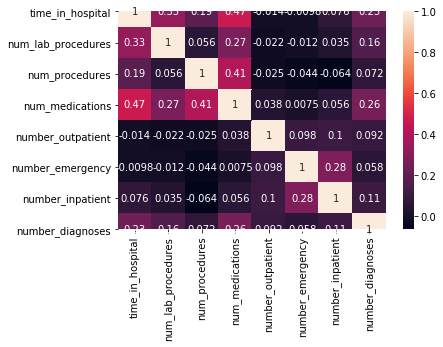

In [39]:
sns.heatmap(df_merged.corr(),annot=True)
plt.show()

# Determining X and y

In [40]:
X=df_merged.drop('readmitted',axis=1)
y=df_merged['readmitted']

#X_num=X.select_dtypes(include=np.number)
#X_cat=X.select_dtypes(include=np.object)

#print('Numeric Columns:',X_num.columns)
#print('Categorical Columns:',X_cat.columns)
#print(X_num.shape,X_cat.shape)

In [41]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
#dummy_var = pd.get_dummies(data = X, drop_first = True)

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

for i in X.columns.astype('object'):
    X[i] = lb.fit_transform(X[i])

In [42]:
#now scale X:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# scale all the numeric variables
# standardize all the columns of the dataframe 'df_num'
#num_scaled =sc.fit_transform(dummy_var)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
#X = pd.DataFrame(num_scaled, columns = dummy_var.columns)

In [43]:
X.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,number_diagnoses,max_glu_serum,A1Cresult,metformin,examide,citoglipton,insulin,change,diabetesMed,numchange
0,2,0,0,0,40,0,0,0,0,0,...,0,2,2,1,0,0,1,1,0,0
2,0,0,2,1,10,5,12,2,0,1,...,5,2,2,1,0,0,1,1,1,0
3,2,1,3,1,43,1,15,0,0,0,...,6,2,2,1,0,0,3,0,1,0
4,2,1,4,0,50,0,7,0,0,0,...,4,2,2,1,0,0,2,0,1,0
6,2,1,6,3,69,1,20,0,0,0,...,6,2,2,2,0,0,2,0,1,0


In [44]:
X.dtypes

race                  int64
gender                int64
age                   int64
time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
diag_1                int64
diag_2                int64
diag_3                int64
number_diagnoses      int64
max_glu_serum         int64
A1Cresult             int64
metformin             int64
examide               int64
citoglipton           int64
insulin               int64
change                int64
diabetesMed           int64
numchange             int64
dtype: object

# Encoding 'y'

In [45]:
y.value_counts()

NO     54864
<30    11357
Name: readmitted, dtype: int64

In [46]:
#y=y.replace({'NO':0,'<30':1,'>30':2})
y=y.replace({'NO':0,'<30':1})

In [47]:
y.value_counts()

0    54864
1    11357
Name: readmitted, dtype: int64

In [48]:
X.shape,y.shape

((66221, 23), (66221,))

In [49]:
from sklearn.model_selection import train_test_split

# Feature selection  (SFS) :

In [50]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import GridSearchCV,KFold


In [51]:
folds = KFold(n_splits=3, shuffle=True,  random_state=0)
params = [{'n_features_to_select' : list(range(1,23))}]

rf = RandomForestClassifier()

sfs1 = sfs(rf, k_features=23, scoring='r2', cv=folds, verbose=3) # as we increase verbose number we get more details
sfs1 = sfs1.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:  1.2min finished

[2020-11-30 09:37:24] Features: 1/23 -- score: -0.16448707936396093[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  1.3min finished

[2020-11-30 09:38:43] Features: 2/23 -- score: -0.16247314840590876[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.0s remaining:    0.0s
[

In [52]:
# Selected features:

sf = pd.DataFrame(sfs1.subsets_).T
sf

,feature_idx,cv_scores,avg_score,feature_names
1,"(9,)","[-0.15836315739759232, -0.17280898832616587, -...",-0.164487,"(number_inpatient,)"
2,"(2, 9)","[-0.16059999659808422, -0.17089731923353968, -...",-0.162473,"(age, number_inpatient)"
3,"(2, 9, 18)","[-0.15868270585480548, -0.17026009620266436, -...",-0.161622,"(age, number_inpatient, citoglipton)"
4,"(2, 9, 14, 18)","[-0.1564458666543136, -0.17280898832616587, -0...",-0.16215,"(age, number_inpatient, max_glu_serum, citogli..."
5,"(2, 9, 14, 17, 18)","[-0.15964135122644474, -0.17185315377985266, -...",-0.163746,"(age, number_inpatient, max_glu_serum, examide..."
6,"(2, 9, 14, 16, 17, 18)","[-0.1599608996836579, -0.17185315377985266, -0...",-0.164913,"(age, number_inpatient, max_glu_serum, metform..."
7,"(2, 9, 14, 16, 17, 18, 21)","[-0.1621977388841498, -0.1724903768107282, -0....",-0.167994,"(age, number_inpatient, max_glu_serum, metform..."
8,"(2, 9, 14, 15, 16, 17, 18, 21)","[-0.16475412654185484, -0.17663232651141825, -...",-0.169908,"(age, number_inpatient, max_glu_serum, A1Cresu..."
9,"(2, 9, 14, 15, 16, 17, 18, 21, 22)","[-0.17561877408710136, -0.1798184416657953, -0...",-0.176714,"(age, number_inpatient, max_glu_serum, A1Cresu..."
10,"(2, 9, 14, 15, 16, 17, 18, 20, 21, 22)","[-0.18009245248808514, -0.1935187368296163, -0...",-0.185213,"(age, number_inpatient, max_glu_serum, A1Cresu..."


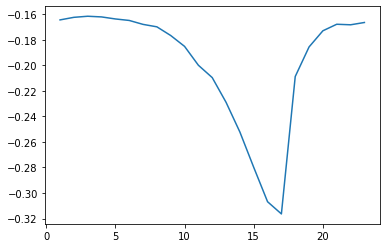

In [53]:
plt.plot(sf['avg_score'])
plt.show()

In [54]:
sf.loc[17,'feature_names']  # 17 because it has more avg_score

('race',
 'gender',
 'age',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'examide',
 'citoglipton',
 'insulin',
 'change',
 'diabetesMed',
 'numchange')

In [55]:
x1 = X[['race','gender','age','num_medications','number_outpatient','number_emergency','number_inpatient',
        'diag_1','max_glu_serum', 'A1Cresult','metformin','examide','citoglipton','insulin','change',
        'diabetesMed','numchange']].copy() 

In [56]:
x1.head()

,race,gender,age,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,max_glu_serum,A1Cresult,metformin,examide,citoglipton,insulin,change,diabetesMed,numchange
0,2,0,0,0,0,0,0,1,2,2,1,0,0,1,1,0,0
2,0,0,2,12,2,0,1,7,2,2,1,0,0,1,1,1,0
3,2,1,3,15,0,0,0,6,2,2,1,0,0,3,0,1,0
4,2,1,4,7,0,0,0,6,2,2,1,0,0,2,0,1,0
6,2,1,6,20,0,0,0,0,2,2,2,0,0,2,0,1,0


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.33, random_state=42)

In [58]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((44368, 17), (44368,), (21853, 17), (21853,))

In [59]:
y.value_counts()

0    54864
1    11357
Name: readmitted, dtype: int64

In [60]:
# lets train model without balancing the data :

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [61]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

cr_LR = classification_report(y_test,predictions)

print('Classification report of LR before applying Sampling:\n\n',cr_LR)

Classification report of LR before applying Sampling:

               precision    recall  f1-score   support

           0       0.84      0.99      0.91     18025
           1       0.64      0.09      0.15      3828

    accuracy                           0.83     21853
   macro avg       0.74      0.54      0.53     21853
weighted avg       0.80      0.83      0.77     21853



/home/shrihari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Synthetic Minority Oversampling Technique (SMOTE)


In [62]:
# This technique generates synthetic data for the minority class.
# SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class 
#    and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point
#    and its neighbors.

In [63]:
# SMOTE algorithm works in 4 simple steps:

# 1. Choose a minority class as the input vector
# 2. Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
# 3. Choose one of these neighbors and place a synthetic point anywhere on the line joining the point 
#      under consideration and its chosen neighbor
# 4. Repeat the steps until data is balanced

In [64]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()



# fit predictor and target variable
X_train_res, y_train_res = smote.fit_sample(X_train, y_train)


print('Before sampling counts of label:\n\n',y_train.value_counts())
print('\nBefore sampling shape of X_train and y_train:\n\n',X_train.shape,y_train.shape)
print('\n\nAfter sampling counts of label:\n\n',y_train_res.value_counts())
print('\nAfter sampling shape of X_train and y_train:\n\n',X_train_res.shape,y_train_res.shape)


Before sampling counts of label:

 0    36839
1     7529
Name: readmitted, dtype: int64

Before sampling shape of X_train and y_train:

 (44368, 17) (44368,)


After sampling counts of label:

 1    36839
0    36839
Name: readmitted, dtype: int64

After sampling shape of X_train and y_train:

 (73678, 17) (73678,)


# Logistic Regression 

In [65]:
# Lets apply Logistic Regression for this SMOTE sampling data:

lr_smote = LogisticRegression()
lr_smote.fit(X_train_res,y_train_res)
predictions_lr_smote = lr_smote.predict(X_test)

cr_LR_smote = classification_report(y_test,predictions_lr_smote)

print('Classification report of LR After applying SMOTE :\n\n',cr_LR_smote)

Classification report of LR After applying SMOTE :

               precision    recall  f1-score   support

           0       0.87      0.69      0.77     18025
           1       0.26      0.50      0.34      3828

    accuracy                           0.66     21853
   macro avg       0.56      0.60      0.55     21853
weighted avg       0.76      0.66      0.69     21853



/home/shrihari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# RandomForest :

In [66]:
# Lets apply Random Forest for SMOTE data sample :

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score


RF_ve=[]
RF_be=[]
for n in np.arange(1,20):
    RF=RandomForestClassifier(n_estimators=n,criterion='entropy',random_state=0)
    kf=KFold(shuffle=True,n_splits=3,random_state=0)
    auc=cross_val_score(RF,X_train_res,y_train_res,cv=kf,scoring='roc_auc')
    RF_be.append(np.mean(1-auc))
    RF_ve.append(np.std(1-auc))

In [67]:
np.min(RF_ve),np.argmin(RF_ve)

(0.0010620632159513044, 2)

In [68]:
RF_be[2]

0.18062000086794813

In [69]:
kf=KFold(shuffle=True,n_splits=3,random_state=0)
rf_smote=RandomForestClassifier(n_estimators=3,criterion='entropy',random_state=0)
auc=cross_val_score(rf_smote,X_train_res,y_train_res,cv=kf,scoring='roc_auc')
BE_rf_smote = np.mean(1-auc)
VE_rf_smote = np.std(1-auc)
print('Bias_error',BE_rf_smote)
print('Var_error',VE_rf_smote)

Bias_error 0.18062000086794813
Var_error 0.0010620632159513044


In [70]:
rf_smote.fit(X_train_res,y_train_res)
predictions_rf_smote = rf_smote.predict(X_test)

cr_rf_smote = classification_report(y_test,predictions_rf_smote)

print('Classification report of RF After applying SMOTE :\n\n',cr_rf_smote)

Classification report of RF After applying SMOTE :

               precision    recall  f1-score   support

           0       0.84      0.74      0.79     18025
           1       0.22      0.35      0.27      3828

    accuracy                           0.67     21853
   macro avg       0.53      0.54      0.53     21853
weighted avg       0.73      0.67      0.70     21853



# Boosted RF :

In [75]:
from sklearn.ensemble import AdaBoostClassifier

RF=RandomForestClassifier(criterion='entropy',n_estimators=5,random_state=0)

RF_be=[]
RF_ve=[]
for n in np.arange(1,20):
    RF_boost=AdaBoostClassifier(base_estimator=RF,n_estimators=n,random_state=0)
    kfold =KFold(shuffle=True,n_splits=3,random_state=0)
    scores=cross_val_score(RF_boost,X_train_res,y_train_res,cv=kfold,scoring='roc_auc')
    RF_be.append(np.mean(1-scores))
    RF_ve.append(np.std(scores,ddof=1))

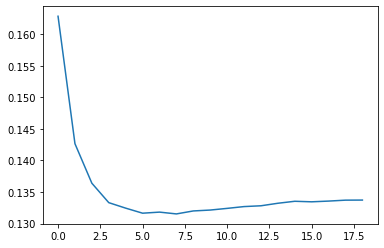

In [76]:
x_axis=np.arange(len(RF_be))
plt.plot(x_axis,RF_be)

In [77]:
np.min(RF_be),np.argmin(RF_be)

(0.1315268345918514, 7)

In [79]:
RF_ve[7]

0.001243142618000609

In [80]:
kf=KFold(shuffle=True,n_splits=3,random_state=0)
RF_boost_smote=AdaBoostClassifier(n_estimators=8,base_estimator=RF,random_state=0)
auc=cross_val_score(RF_boost_smote,X_train_res,y_train_res,cv=kf,scoring='roc_auc')
BE_rf_boost_smote= np.mean(1-auc)
VE_rf_boost_smote = np.std(auc,ddof=1)
print('Bias_error',BE_rf_boost_smote)
print('Var_error',VE_rf_boost_smote)

Bias_error 0.1315268345918514
Var_error 0.001243142618000609


In [81]:
RF_boost_smote.fit(X_train_res,y_train_res)
predictions_rf_boost_smote = RF_boost_smote.predict(X_test)

cr_rf_boost_smote = classification_report(y_test,predictions_rf_boost_smote)

print('Classification report of RF After applying SMOTE :\n\n',cr_rf_boost_smote)

Classification report of RF After applying SMOTE :

               precision    recall  f1-score   support

           0       0.84      0.79      0.81     18025
           1       0.23      0.31      0.27      3828

    accuracy                           0.70     21853
   macro avg       0.54      0.55      0.54     21853
weighted avg       0.74      0.70      0.72     21853



# KNN :

In [82]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV

In [83]:
knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,30),'weights':['uniform','distance']}
gs=GridSearchCV(estimator=knn,param_grid=params,cv=kfold,scoring='f1_weighted')
gs.fit(X_train_res,y_train_res)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [84]:
gs.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [85]:
knn_smote=KNeighborsClassifier(n_neighbors=4, weights='distance')


kf=KFold(shuffle=True,n_splits=3,random_state=0) 
scores=cross_val_score(knn_smote,X_train_res,y_train_res,scoring='roc_auc',cv=kf)
auc_score=np.mean(scores)
BE_knn_smote=1-np.mean(scores)
VE_knn_smote=np.std(scores,ddof=1)

print('BE:',BE_knn_smote)
print('VE:',VE_knn_smote)

BE: 0.15154914617004966
VE: 0.0008824591199661221


In [86]:
knn_smote.fit(X_train_res,y_train_res)
predictions_knn_smote = knn_smote.predict(X_test)

cr_knn_smote = classification_report(y_test,predictions_knn_smote)

print('Classification report of KNN After applying SMOTE :\n\n',cr_knn_smote)

Classification report of KNN After applying SMOTE :

               precision    recall  f1-score   support

           0       0.84      0.76      0.80     18025
           1       0.23      0.34      0.28      3828

    accuracy                           0.69     21853
   macro avg       0.54      0.55      0.54     21853
weighted avg       0.74      0.69      0.71     21853



# Bagged KNN :

In [90]:
from sklearn.ensemble import BaggingClassifier

knn=KNeighborsClassifier(n_neighbors=4,weights='distance')
BagKNN_be=[]
BagKNN_ve=[]
for n in np.arange(1,10):
    knn_bag=BaggingClassifier(base_estimator=knn,n_estimators=n,random_state=0)
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    scores=cross_val_score(knn_bag,X_train_res,y_train_res,cv=kfold,scoring='roc_auc')
    BagKNN_be.append(np.mean(1-scores))
    BagKNN_ve.append(np.std(scores,ddof=1))

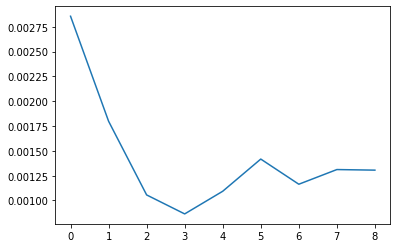

In [91]:
x_axis=np.arange(len(BagKNN_ve))
plt.plot(x_axis,BagKNN_ve)

In [92]:
np.min(BagKNN_ve),np.argmin(BagKNN_ve)

(0.0008646985799974415, 3)

In [93]:
BagKNN_be[3]

0.14625919022272982

In [94]:
kf=KFold(shuffle=True,n_splits=3,random_state=0)
knn_bag_smote=BaggingClassifier(base_estimator=knn,n_estimators=4,random_state=0)
auc=cross_val_score(knn_bag_smote,X_train_res,y_train_res,cv=kf,scoring='roc_auc')
BE_bag_knn_smote= np.mean(1-auc)
VE_bag_knn_smote = np.std(auc,ddof=1)
print('Bias_error',BE_bag_knn_smote)
print('Var_error',VE_bag_knn_smote)

Bias_error 0.14625919022272982
Var_error 0.0008646985799974415


In [95]:

knn_bag_smote.fit(X_train_res,y_train_res)
predictions_knn_bag_smote =knn_bag_smote.predict(X_test)
cr_knn_bag_smote = classification_report(y_test,predictions_knn_bag_smote)

print('Classification report of bagged_knn After applying SMOTE :\n\n',cr_knn_bag_smote)

Classification report of bagged_knn After applying SMOTE :

               precision    recall  f1-score   support

           0       0.85      0.68      0.75     18025
           1       0.22      0.43      0.29      3828

    accuracy                           0.63     21853
   macro avg       0.53      0.55      0.52     21853
weighted avg       0.74      0.63      0.67     21853



# Gradientboost :

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

GB_be=[]
GB_ve=[]
for n in np.arange(1,200):
    GB=GradientBoostingClassifier(n_estimators=n,random_state=0)
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    scores=cross_val_score(GB,X_train_res,y_train_res,cv=kfold,scoring='roc_auc')
    GB_be.append(np.mean(1-scores))
    GB_ve.append(np.std(scores,ddof=1))

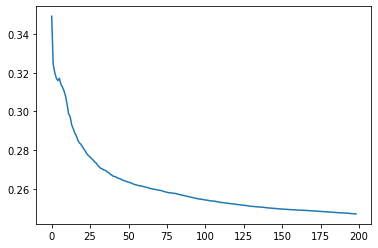

In [100]:
x_axis=np.arange(len(GB_be))
plt.plot(x_axis,GB_be)

In [101]:
np.min(GB_be),np.argmin(GB_be)

(0.24705085803542226, 198)

In [102]:
GB_ve[198]

0.004709833469942074

In [103]:
kf=KFold(shuffle=True,n_splits=3,random_state=0)
GB_smote=GradientBoostingClassifier(n_estimators=199,random_state=0)
auc=cross_val_score(GB_smote,X_train_res,y_train_res,cv=kf,scoring='roc_auc')
BE_GB= np.mean(1-auc)
VE_GB = np.std(auc,ddof=1)
print('Bias_error',BE_GB)
print('Var_error',VE_GB)

Bias_error 0.24705085803542226
Var_error 0.004709833469942074


In [104]:
GB_smote.fit(X_train_res,y_train_res)
predictions_GB_smote =GB_smote.predict(X_test)
cr_GB_smote = classification_report(y_test,predictions_GB_smote)

print('Classification report of GradientBoost after aplying SMOTE :\n\n',cr_GB_smote)

Classification report of GradientBoost after aplying SMOTE :

               precision    recall  f1-score   support

           0       0.86      0.69      0.77     18025
           1       0.25      0.49      0.33      3828

    accuracy                           0.65     21853
   macro avg       0.56      0.59      0.55     21853
weighted avg       0.76      0.65      0.69     21853



# Naive_Bayes :

In [105]:
from sklearn.naive_bayes import GaussianNB
NB_smote = GaussianNB()

In [106]:
kf = KFold(n_splits=3,shuffle=True,random_state=0)
score = cross_val_score(NB_smote,X_train_res,y_train_res,cv=kf,scoring='roc_auc')
BE_NB_smote=1-np.mean(scores)
VE_NB_smote=np.std(scores,ddof=1)

print('BE:',BE_NB_smote)
print('VE:',VE_NB_smote)

BE: 0.24705085803542237
VE: 0.004709833469942074


In [107]:
NB_smote.fit(X_train_res,y_train_res)
predictions_NB_smote = NB_smote.predict(X_test)

cr_NB_smote = classification_report(y_test,predictions_NB_smote)

print('Classification report of NB After applying SMOTE :\n\n',cr_knn_smote)

Classification report of NB After applying SMOTE :

               precision    recall  f1-score   support

           0       0.84      0.76      0.80     18025
           1       0.23      0.34      0.28      3828

    accuracy                           0.69     21853
   macro avg       0.54      0.55      0.54     21853
weighted avg       0.74      0.69      0.71     21853



# SVM :

In [109]:
# training a linear SVM classifier 

from sklearn.svm import SVC 
svm_smote = SVC(kernel = 'linear', C = 1).fit(X_train_res, y_train_res)

kfold = KFold(shuffle=True,n_splits=3,random_state=0)
scores=cross_val_score(svm_smote,X_train_res,y_train_res,scoring='roc_auc',cv=kfold)
  
BE_smote= np.mean(1-scores)
VE_smote = np.std(scores,ddof=1)
print('Bias_error',BE_smote)
print('Var_error',VE_smote)

Bias_error 0.29925571831389386
Var_error 0.002567852070430816


In [110]:
svm_smote.fit(X_train_res,y_train_res)
predictions_svm_smote = svm_smote.predict(X_test)

cr_svm_smote = classification_report(y_test,predictions_svm_smote)

print('Classification report of SVM After applying SMOTE :\n\n',cr_svm_smote)

Classification report of SVM After applying SMOTE :

               precision    recall  f1-score   support

           0       0.86      0.73      0.79     18025
           1       0.27      0.46      0.34      3828

    accuracy                           0.68     21853
   macro avg       0.57      0.60      0.57     21853
weighted avg       0.76      0.68      0.71     21853



In [112]:
from sklearn import metrics
cm_svm_smote=metrics.confusion_matrix(y_test,predictions_svm_smote)
print('\nconfussion matrix:\n',cm_svm_smote)


confussion matrix:
 [[13190  4835]
 [ 2068  1760]]


# NearMiss Algorithm :

In [83]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss,y_train_miss = nr.fit_sample(X_train,y_train)

print('Before sampling counts of label:\n\n',y_train.value_counts())
print('\nBefore sampling shape of X_train and y_train:\n\n',X_train.shape,y_train.shape)
print('\n\nAfter sampling counts of label:\n\n',y_train_miss.value_counts())
print('\nAfter sampling shape of X_train and y_train:\n\n',X_train_miss.shape,y_train_miss.shape)

Before sampling counts of label:

 0    36839
1     7529
Name: readmitted, dtype: int64

Before sampling shape of X_train and y_train:

 (44368, 17) (44368,)


After sampling counts of label:

 1    7529
0    7529
Name: readmitted, dtype: int64

After sampling shape of X_train and y_train:

 (15058, 17) (15058,)


# Logistic Regression 

In [84]:
# Lets apply Logistic Regression for this NearMiss sampling data:

lr_miss = LogisticRegression()
lr_miss.fit(X_train_miss,y_train_miss)
predictions_lr_miss = lr_miss.predict(X_test)

cr_LR_miss = classification_report(y_test,predictions_lr_miss)

print('Classification report of LR After applying SMOTE :\n\n',cr_LR_miss)

Classification report of LR After applying SMOTE :

               precision    recall  f1-score   support

           0       0.86      0.44      0.58     18025
           1       0.20      0.67      0.31      3828

    accuracy                           0.48     21853
   macro avg       0.53      0.56      0.45     21853
weighted avg       0.75      0.48      0.53     21853



/home/shrihari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# RandomForest :

In [96]:
# Lets apply Random Forest for SMOTE data sample :

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score


RF_ve=[]
RF_be=[]
for n in np.arange(1,20):
    RF=RandomForestClassifier(n_estimators=n,criterion='entropy',random_state=0)
    kf=KFold(shuffle=True,n_splits=3,random_state=0)
    auc=cross_val_score(RF,X_train_miss,y_train_miss,cv=kf,scoring='roc_auc')
    RF_be.append(np.mean(1-auc))
    RF_ve.append(np.std(1-auc))

In [97]:
np.min(RF_ve),np.argmin(RF_ve)

(0.005032222666828469, 8)

In [98]:
RF_be[8]

0.20139830078516652

In [99]:
kf=KFold(shuffle=True,n_splits=3,random_state=0)
rf_miss=RandomForestClassifier(n_estimators=9,criterion='entropy',random_state=0)
auc=cross_val_score(rf_miss,X_train_miss,y_train_miss,cv=kf,scoring='roc_auc')
BE_rf_miss = np.mean(1-auc)
VE_rf_miss = np.std(1-auc)
print('Bias_error',BE_rf_miss)
print('Var_error',VE_rf_miss)

Bias_error 0.20139830078516652
Var_error 0.005032222666828469


In [101]:
rf_miss.fit(X_train_miss,y_train_miss)
predictions_rf_miss = rf_miss.predict(X_test)

cr_rf_miss = classification_report(y_test,predictions_rf_miss)

print('Classification report of RF After applying NearMiss :\n\n',cr_rf_miss)

Classification report of RF After applying NearMiss :

               precision    recall  f1-score   support

           0       0.86      0.31      0.46     18025
           1       0.19      0.76      0.31      3828

    accuracy                           0.39     21853
   macro avg       0.53      0.54      0.38     21853
weighted avg       0.74      0.39      0.43     21853

